In [1]:
import numpy as np
import matplotlib.pyplot as plt
import anacal
from deep_anacal import simulate, utils
%load_ext autoreload
%autoreload 2

In [2]:
seed = 2
ngrid = 64
nstamp = 200
ny = ngrid * nstamp
nx = ngrid * nstamp
scale = 0.2
indx = np.arange(ngrid // 2, ngrid * nstamp, ngrid)
indy = np.arange(ngrid // 2, ngrid * nstamp, ngrid)
ns = len(indx) * len(indy)
inds = np.meshgrid(indy, indx, indexing="ij")
yx = np.vstack([np.ravel(_) for _ in inds])
dtype = np.dtype(
    [
        ("y", np.int32),
        ("x", np.int32),
        ("is_peak", np.int32),
        ("mask_value", np.int32),
    ]
)
detection = np.empty(ns, dtype=dtype)
detection["y"] = yx[0]
detection["x"] = yx[1]
detection["is_peak"] = np.ones(ns)
detection["mask_value"] = np.zeros(ns)

In [3]:
acal_res = []
fpfs_config = anacal.fpfs.FpfsConfig(
    sigma_arcsec=0.52
)
noise_std = 0.005398909375071525
for shear in [0.02, -0.02]:
    gal_array, psf_array, img_noise, noise_array = simulate.simulate_exponential(
        seed=seed,
        ngrid=ngrid,
        ny=ny,
        nx=nx,
        scale=scale,
        g1=shear,
        g2=0.0,
        return_noise=True,
        noise_std=noise_std
    )
    acal_res.append(
        anacal.fpfs.process_image(
            fpfs_config=fpfs_config,
            mag_zero=30.0,
            gal_array=gal_array + img_noise,
            psf_array=psf_array,
            pixel_scale=scale,
            noise_variance=noise_std**2,
            noise_array=noise_array,
            detection=detection,
        )
    )

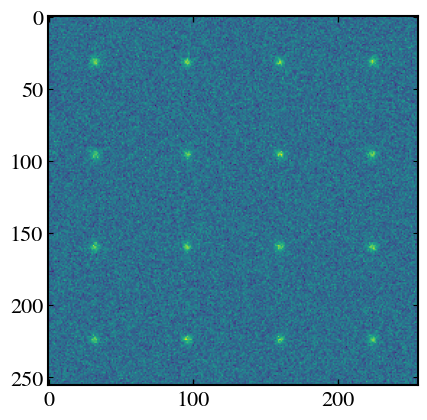

In [4]:
plt.imshow(gal_array[:64*4, :64*4] + img_noise[:64*4, :64*4])

In [5]:
mbias, cbias = utils.compute_m_and_c(acal_res=acal_res, force_detection=True)
print("m: %f [1e-3]" % (mbias/1e-3), flush=True)
print("c: %f [1e-4]" % (cbias/1e-4), flush=True)

m: 0.835975 [1e-3]
c: -7.741293 [1e-4]
